# Laplace transforms in SymPy

$$\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s$$

In [40]:
import sympy
sympy.init_printing()

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

## Direct evaluation

In [4]:
f = sympy.exp(-a*t)
f

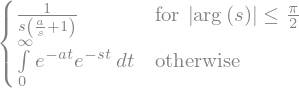

In [5]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

## Library Function

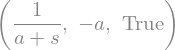

In [6]:
sympy.laplace_transform(f, t, s)

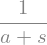

In [8]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [9]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

In [10]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [11]:
invL(F)

## What is the $\theta$

The unit step function is also known as the Heaviside step function. We will see this function often in inverse laplace transforms. It is typeset as $θ(t)$ by sympy.

In [12]:
sympy.Heaviside(t)

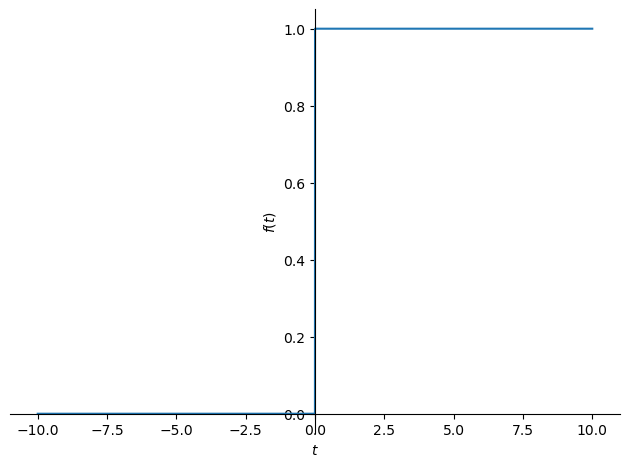

In [17]:
sympy.plot(sympy.Heaviside(t))

Look at the difference between $f$ and the inverse laplace transform we obtained, which contains the unit step to force it to zero before $t=0$.

In [18]:
invL(F).subs({a: 2})

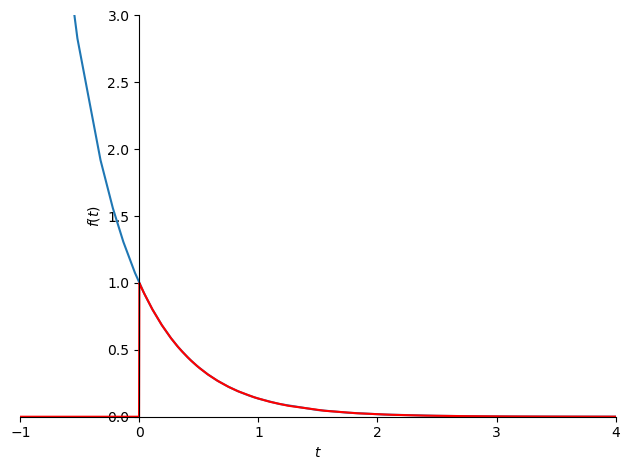

In [19]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}),
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

## Reproducing standard transform table

In [20]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

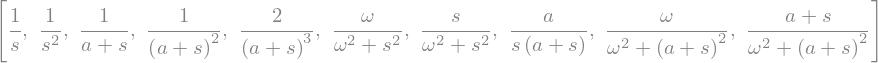

In [21]:
Fs = [L(f) for f in functions]
Fs

In [42]:
from pandas import DataFrame

In [63]:
def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args]

In [65]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$
8,$$e^{- a t} \sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + \left(a + s\right...
9,$$e^{- a t} \cos{\left(\omega t \right)}$$,$$\frac{a + s}{\omega^{2} + \left(a + s\right)...


## More complicated inverses

In [53]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))

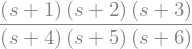

In [54]:
F

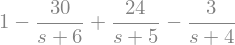

In [55]:
F.apart(s)

In [56]:
invL(F)

In [57]:
invL(F).simplify()

In [58]:
invL(F.apart(s))